# Random matrix and its process
___

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt


%matplotlib inline
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_formats = {'png', 'retina'}

## Dyson model
___
Hermitan matrix:
$$ \begin{pmatrix}
B_{11}(t) & \cdots & B_{1i}(t) & \cdots & B_{1n}(t)\\
\vdots & \ddots &        &        & \vdots \\
\overline{B_{1i}(t)} &        & B_{ii}(t) &        & B_{in}(t) \\
\vdots &        &        & \ddots & \vdots \\
\overline{B_{1n}(t)} & \cdots & \overline{B_{in}(t)} & \cdots & B_{nn}(t)
\end{pmatrix},
$$
where $B_{ii}(t)$ is a Brownian motion on $\mathbb{R}$ and $B_{ij}\,(i \neq j)$ is a Brownian motion on $\mathbb{C}$.
Eigen Value process rarely conflicts.

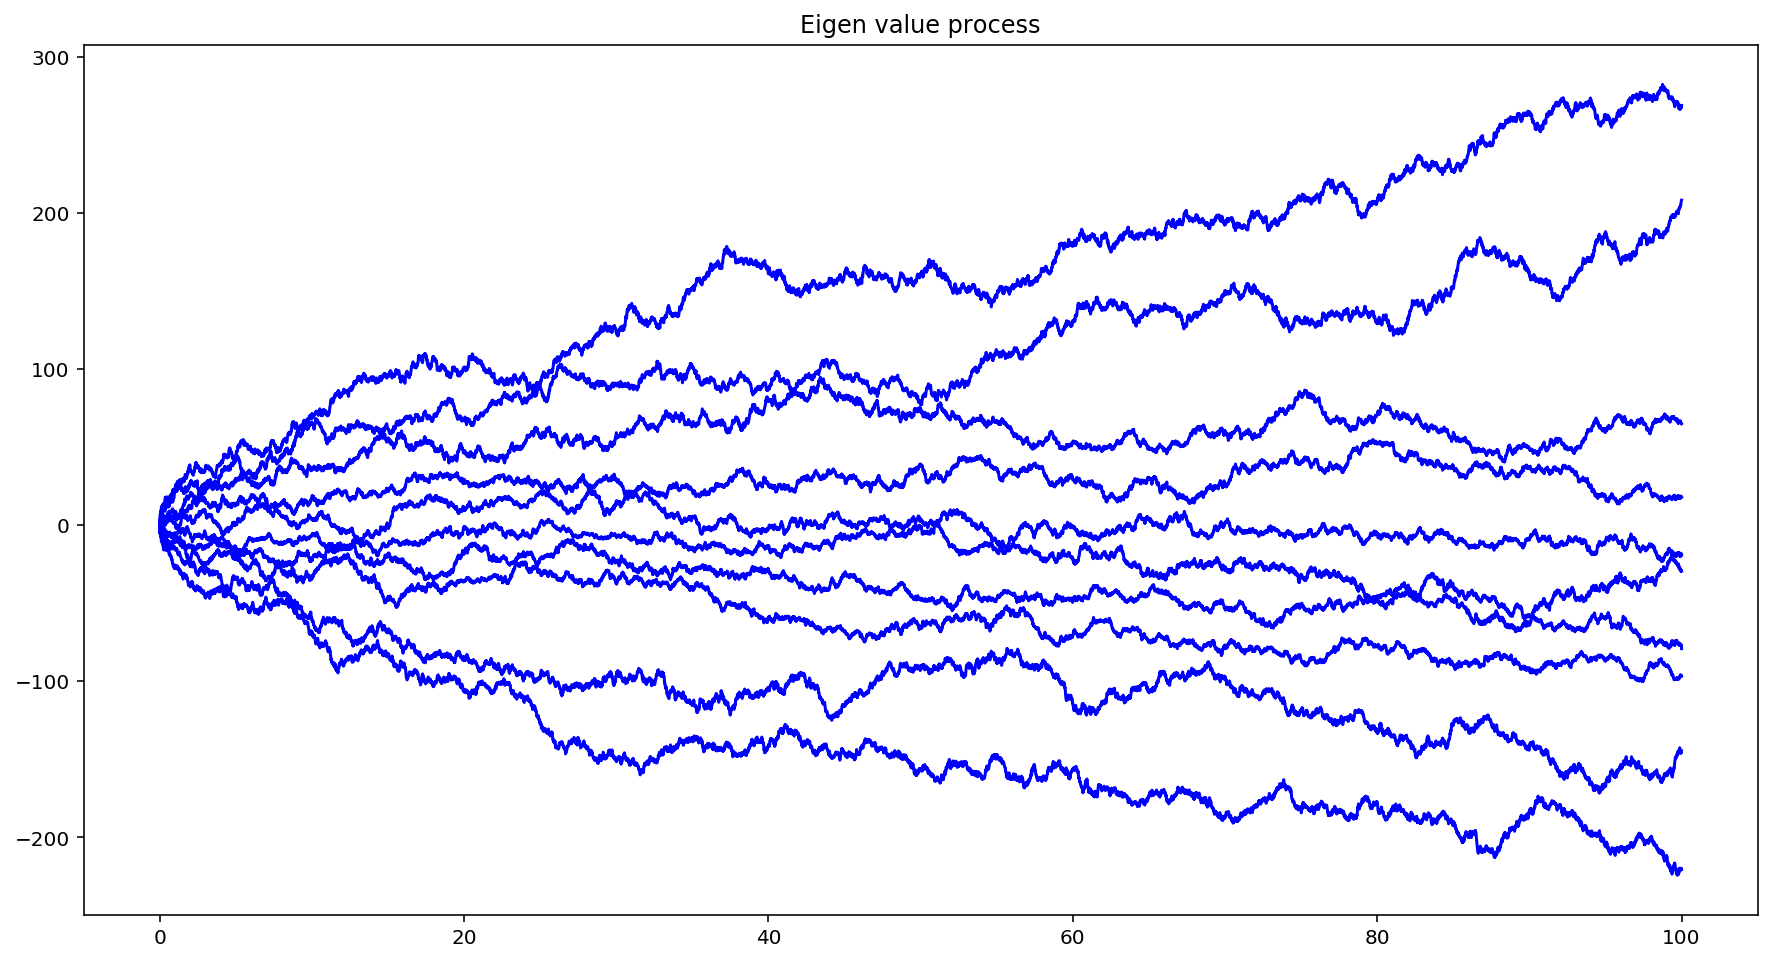

CPU times: user 28.8 s, sys: 14.8 s, total: 43.6 s
Wall time: 18.6 s


In [2]:
%%time

N = 10
step = 10000
time_delta = 0.01

matrix = np.zeros((N, N))
for i in range(N):
    matrix[i, i] = (i - N//2) * 1

eigs = [linalg.eigh(matrix, eigvals_only=True)]

for _ in range(step):
    for i in range(N):
        for j in range(N):
            if i == j:
                matrix[i, j] += np.random.randn(1) * np.sqrt(time_delta)
            elif i < j:
                matrix[i, j] += (np.random.randn(1) + np.random.randn(1) * j) / np.sqrt(2) * np.sqrt(time_delta)
            else:
                matrix[i, j] = matrix[j, i].conj()
    eigs.append(linalg.eigh(matrix, eigvals_only=True))

plt.figure(figsize=(15, 8))
t = np.arange(0, (step+1)*time_delta, time_delta)
plt.plot(t, eigs, color='blue')
plt.title('Eigen value process')
plt.show()


### Compare: Brownian motion  
Many paths conflict many times.

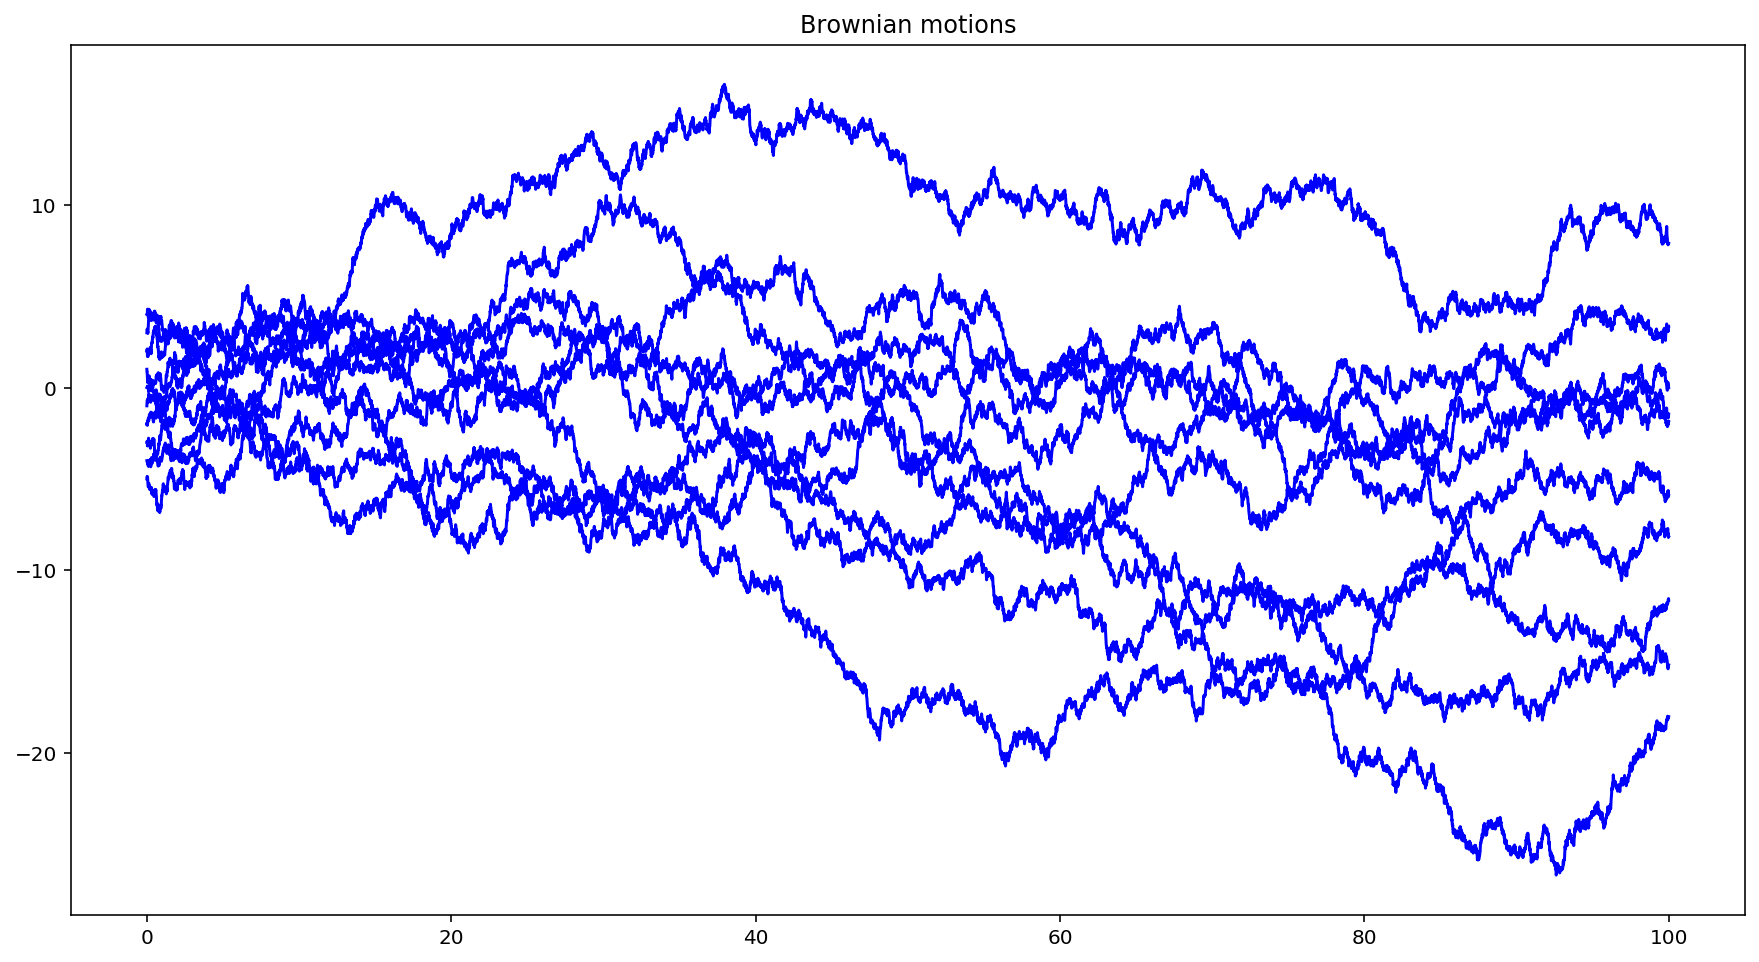

In [3]:
N = 10
step = 10000
time_delta = 0.01

r = np.random.randn(step+1, N) * np.sqrt(time_delta)
r[0] = [(i - N//2) * 1 for i in range(N)]

b = np.cumsum(r, axis=0)

plt.figure(figsize=(15, 8))
t = np.arange(0, (step+1)*time_delta, time_delta)
plt.plot(t, b, color='b')
plt.title('Brownian motions')
plt.show()